In [4]:
import rheopy.laminar as laminar

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Non-Newtonian slit flow calculator examples

## Governing equations

### Shear rate

$\dot{\gamma} \eta \left( \dot{\gamma} \right) - y \frac{\Delta P}{L}=0$ where y goes from -H/2 to H/2.  The viscosity function $\eta(\dot{\gamma})$ may be any well posed function of shear rate.  The equation is solved numerically using scipy.brentq whenever a shear rate at any height y is needed.

### Velocity

$v_z(y) = \int_{\frac{H}{2}}^{y} \dot{\gamma}(y) dy$ where y is any height between 0 and H/2.  The equation is integrated numerically using scipy.quad.

### Volumetric flow rate

$Q = 2W \int_{0}^{\frac{H}{2}} v_z(y) dy$



## Newtonian example

In [5]:
my_newt = laminar.newtonian('sample Newtonian',mu=1.)

/Users/whhiv/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3370: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


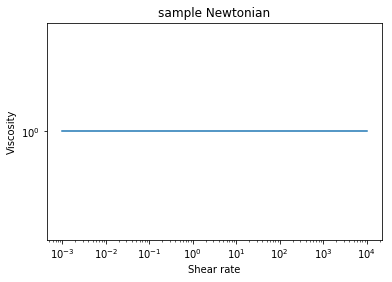

In [6]:
my_newt.visc_plot()

In [7]:
print(my_newt)

sample Newtonian
mu =1.0



In [8]:
my_slit = laminar.laminar_slit_flow(name='my Newtonian laminar flow slit',density=1000.,
                               height=.01,width=.1,length=1.0,viscosity=my_newt)

In [9]:
print(my_slit)

Name =my Newtonian laminar flow slit
Height =0.01
Width =0.1
Length =1.0
Pressure drop =None
Flow rate =None
Shear rate wall = None


In [10]:
my_slit.pressure_drop

In [11]:
my_slit.q

In [12]:
my_slit.pressure_drop = 10000.

In [13]:
print(my_slit)

Name =my Newtonian laminar flow slit
Height =0.01
Width =0.1
Length =1.0
Pressure drop =10000.0
Flow rate =8.333333333333337e-05
Shear rate wall = 50.0


In [14]:
my_slit.vz(.0,10000.)

0.125

In [15]:
my_slit.pressure_drop = 20000.

In [16]:
my_slit.q

0.00016666666666666674

In [17]:
print(my_slit)

Name =my Newtonian laminar flow slit
Height =0.01
Width =0.1
Length =1.0
Pressure drop =20000.0
Flow rate =0.00016666666666666674
Shear rate wall = 100.0


In [18]:
my_slit.q = 8.33e-5

In [19]:
print(my_slit)

Name =my Newtonian laminar flow slit
Height =0.01
Width =0.1
Length =1.0
Pressure drop =9996.000000000002
Flow rate =8.33e-05
Shear rate wall = 49.98000000000001


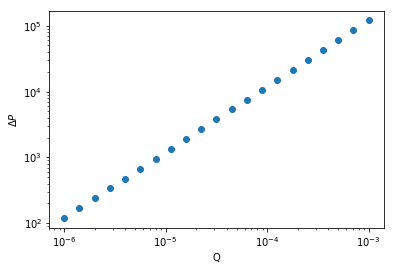

In [20]:
q_plot = np.logspace(-6,-3,21)
dp_plot = [my_slit.pressure_drop for my_slit.q in q_plot]
plt.loglog(q_plot,dp_plot,'o')
plt.xlabel('Q')
plt.ylabel('$\Delta P$');

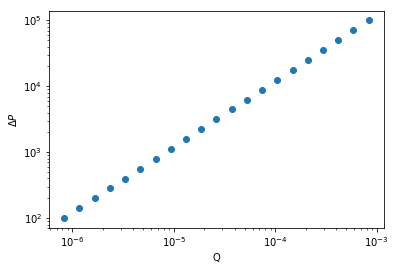

In [21]:
dp_plot = np.logspace(2,5,21)
q_plot = [my_slit.q for my_slit.pressure_drop in dp_plot]
plt.loglog(q_plot,dp_plot,'o')
plt.xlabel('Q')
plt.ylabel('$\Delta P$');

In [22]:
print(my_slit)

Name =my Newtonian laminar flow slit
Height =0.01
Width =0.1
Length =1.0
Pressure drop =100000.0
Flow rate =0.0008333333333333333
Shear rate wall = 500.0


## Herschel-Bulkley example

### The Herschel-Bulkley model function

The Herschel-Bulkley model is written as $$\eta \left( \dot{\gamma} \right) = \frac{\tau_y}{\dot{\gamma}}+k \dot{\gamma}^{n-1}$$ where $tau_y$, k, and n are parameters.

To deal with $\dot{\gamma}=0$, the Papanasatasiou relation is used, resulting in $$\eta \left( \dot{\gamma} \right) = \left( 1 - e^{-m \dot{\gamma}} \right )\frac{\tau_y}{\dot{\gamma}}+k \dot{\gamma}^{n-1}$$ where m is a large value.


In [23]:
tauy=10.
k=5.
n=0.7
hb_model = laminar.herschel_bulkley('my HB test',tauy,k,n)

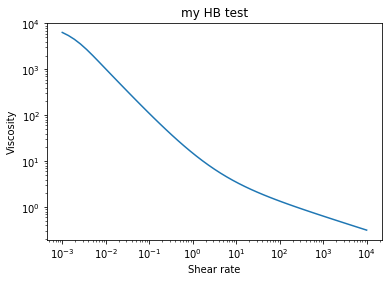

In [24]:
hb_model.visc_plot()

To see the effect of m, plot low shear rates

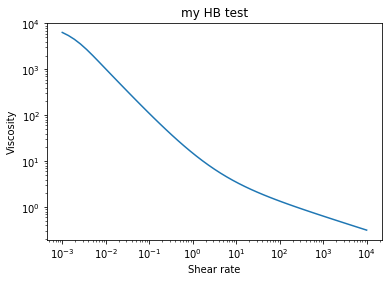

In [25]:
hb_model.visc_plot()

### Create a slit with hb_model as viscosity function

In [26]:
density = 1000.
height = 0.01
width = 0.1
length = 1.0

hb_slit = laminar.laminar_slit_flow('My Herschel-Bulkley slit',density=density,height=height,width=width, \
                length=length,viscosity=hb_model)

In [27]:
print(hb_slit)

Name =My Herschel-Bulkley slit
Height =0.01
Width =0.1
Length =1.0
Pressure drop =None
Flow rate =None
Shear rate wall = None


In [28]:
hb_slit.pressure_drop = 10000.

In [29]:
print(hb_slit)

Name =My Herschel-Bulkley slit
Height =0.01
Width =0.1
Length =1.0
Pressure drop =10000.0
Flow rate =2.462904235242411e-05
Shear rate wall = 19.504218468057328


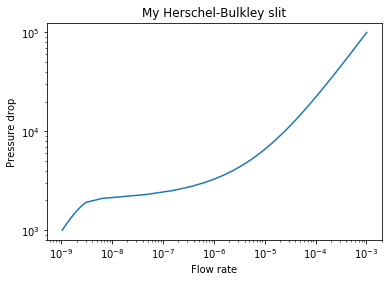

In [30]:
hb_slit.q_plot(1000.,100000.)

In [31]:
hb_slit.re_wall()

0.09607404454014327

# Carreau viscosity model example

The Carreau viscosity model may be expressed with four parameters as:

$ \eta \left( \dot{\gamma} \right) = \eta_{\infty}+\frac{\eta_0-\eta_{\infty}}{\left( 1+\left(\lambda \dot{\gamma} \right)^a \right)}^{\frac{1-n}{n}} $

To instantiate an object of class Carreau, we use

In [32]:
my_carreau_model = laminar.carreau('My first Carreau model',
                                   eta0=5.,etainf=.11,reltime=.02,a=1.3,n=.3)

To compute the viscosity at a specified shear rate, we use the calc_visc(rate) method

In [33]:
my_carreau_model.calc_visc(rate=10.)

4.7030017198606435

To view the model parameters, we use the print method

In [34]:
print(my_carreau_model)

My first Carreau model
eta0 =5.0
etainf =0.11
reltime =0.02
a =1.3
n=0.3



To plot the viscosity versus shear rate on a log-log plot, we use the method visc_plot(rate_min,rate_max), which is inherited from the Property_plot class.

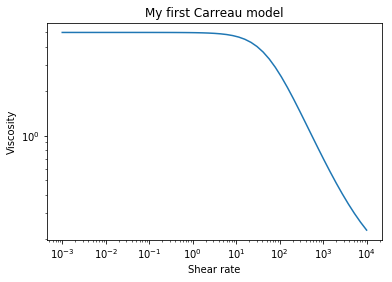

In [35]:
my_carreau_model.visc_plot()

# Laminar slit flow - Carreau viscosity model

We will instantiate an object my_pipe with a few properties and also use the object my_carreau_model to specifiy the viscosity behavior.

In [36]:
my_slit = laminar.laminar_slit_flow('my laminar flow slit',density=1000.,
                               height=.01,width=.1,length=1.0,viscosity=my_carreau_model)

Set the pressure drop

In [37]:
my_slit.pressure_drop = 20000.

In [38]:
my_slit.q

3.747002759454248e-05

In [39]:
print(my_slit)

Name =my laminar flow slit
Height =0.01
Width =0.1
Length =1.0
Pressure drop =20000.0
Flow rate =3.747002759454248e-05
Shear rate wall = 23.673966897448764


In [40]:
my_slit.pressure_drop = 40000.

In [41]:
my_slit.q

9.060818549454033e-05

Check the object propperties by using print

In [13]:
print(my_slit)

Name =my laminar flow slit
Height =0.01
Width =0.1
Length =1.0
Pressure drop =40000.0
Flow rate =9.060818549454033e-05
Shear rate wall = 62.29932871052238


We can check the viscosity model used by my_pipe

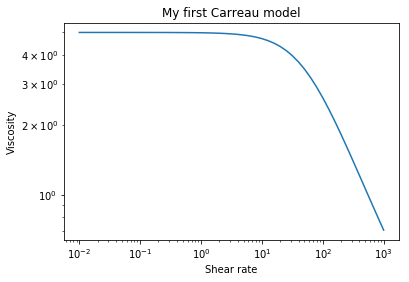

In [10]:
my_pipe.viscosity.visc_plot(.01,1000.)

## There are several methods in the Laminar_Flow class instantiated in my_pipe

### Shear rate

The shear rate at any radial position between r=0 and r=radius is essential to all calculations here.  We will calculate the shear rate at the radial position of the outer wall, r=radius.  There are three different ways to do this.

In [11]:
my_pipe.shear_rate(.005)

10.686761568529178

In [12]:
my_pipe.shear_rate(my_pipe.radius)

23.673966897448764

In [13]:
my_pipe.shear_rate_wall()

23.673966897448764

There is a method to plot the shear rate as a function of radial position, shear_rate_plot()

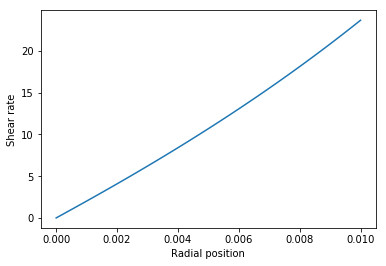

In [14]:
my_pipe.shear_rate_plot()

In [15]:
help(my_pipe)

Help on laminar_tube_flow in module rheopy.laminar object:

class laminar_tube_flow(builtins.object)
 |  This class contains a variety of methods for computing quantities of interest for laminar flow in a tube.
 |  The argument viscosity requires a function (or class with method) calc_visc with parameters already set 
 |  and the shear rate as it's only argument.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, density, radius, length, viscosity)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  dp(self, q_want)
 |      Computes the pressure drop for a volumetric flow rate of q_want.
 |      The computation is iterative due to nature of many viscosity functiions.
 |      The object attribute self.pressure_drop is set to result.
 |  
 |  q(self, dp_want)
 |      Computes volumetric flow rate for preessure drop argument of dp_want.
 |      The object attribute self.pressure_drop is set to dp_want.


### Axial velocity

The axial velocity is computed using the method vz(radialpos) and may be plotted across the entire radius using the method vz_plot.

In [16]:
my_pipe.vz(0.)

0.11070626136747272

In [17]:
my_pipe.vz(my_pipe.radius)

-0.0

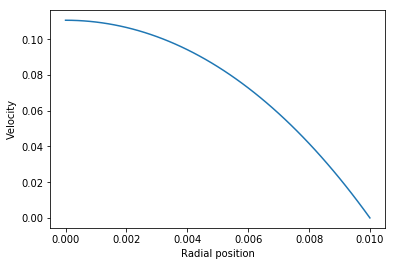

In [18]:
my_pipe.vz_plot()

### Flow rate versus pressure drop

The flow rate may be calculated as a function of pressure drop, or pressure drop as a function of flow rate.  Both are shown here.  Finally a log-log plot of pressure drop as a function of flowrate is shown.

In [19]:
my_pipe.pressure_drop

20000.0

In [20]:
my_pipe.q(2000.)

1.5803556310062981e-06

In [21]:
my_pipe.dp(1.580e-6)

1999.553464911511

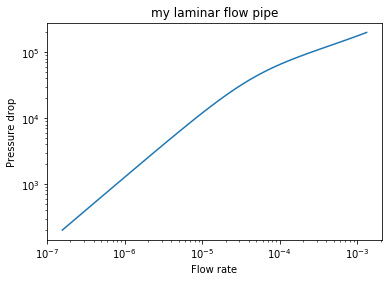

In [22]:
my_pipe.q_plot(pressure_drop_min=200.,pressure_drop_max=200000.)

# Laminar pipe flow - 3-Comp viscosity model

The 3-component viscosity model may be expressed with three parameters as:

$ \eta \left( \dot{\gamma} \right) = \frac{\tau_y}{\dot{\gamma}} + \frac{\tau_y}{\dot{\gamma}}\left( \frac{\dot{\gamma}_{crit}}{\dot{\gamma}}\right)^n + \eta_{bg} $

To instantiate an object of class Three_component, we use

In [23]:
my_3c_viscosity = laminar.three_component('my 3-comp viscosity model',tauy=100.,gamma_crit=10., eta_bg=1.)

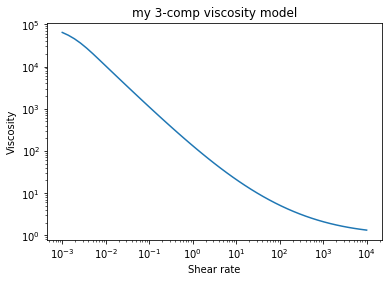

In [24]:
my_3c_viscosity.visc_plot(.001,10000.)

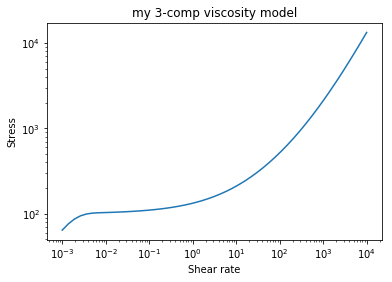

In [25]:
my_3c_viscosity.stress_plot(.001,10000.)

In [26]:
my_3c_pipe = laminar.laminar_tube_flow('my 3-comp pipe',density=1000.,
                                  radius=.01,length=1.,viscosity=my_3c_viscosity)

In [29]:
my_3c_pipe.pressure_drop = 2000.

In [30]:
print(my_3c_pipe)

Name =my 3-comp pipe
Radius =0.01
Length =1.0
Pressure drop =2000.0
Computed
Flow rate =7.879156360642064e-11
Wall shear rate =0.00010182123549225306


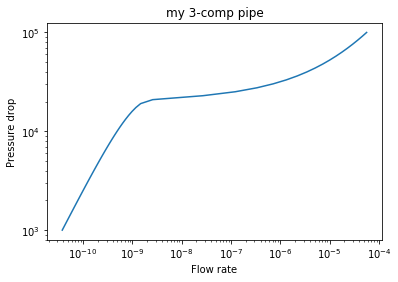

In [31]:
my_3c_pipe.q_plot(1000.,100000.)

In [32]:
my_3c_pipe.pressure_drop=50000.
my_3c_pipe.q(50000.)

8.488407353813105e-06

In [33]:
my_3c_pipe.dp(q_want=8.488e-06)

49999.313119416074

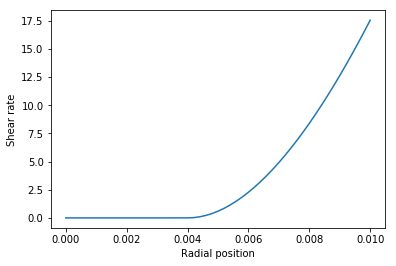

In [34]:
my_3c_pipe.shear_rate_plot()

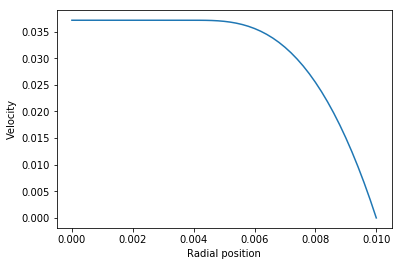

In [35]:
my_3c_pipe.vz_plot()